In [1]:
%cd /kaggle/working

/kaggle/working


In [2]:
import numpy as np
import polars as pl

In [26]:
test_info_df = pl.read_parquet("output/preprocess/make_hack_map/base/test_info.parquet")
test_old_info_df = pl.read_parquet(
    "output/preprocess/make_hack_map/base/test_old_info.parquet"
)

In [27]:
test_info_df.head()

sample_id,location,month,day,seconds,tick
str,u32,i64,i64,i64,i64
"""test_0""",230,3,8,28800,24
"""test_10""",55,3,14,0,0
"""test_100""",1,7,27,0,0
"""test_1000""",25,7,24,57600,48
"""test_10000""",216,3,18,57600,48


In [28]:
test_pred_df = pl.read_parquet(
    "output/experiments/810_pred_elaps_time/base/test_predict.parquet"
)
oof_df = pl.read_parquet("output/experiments/810_pred_elaps_time/base/oof.parquet")

In [29]:
test_info_df = test_info_df.with_columns(
    [
        (
            pl.datetime(2000, pl.col("month"), pl.col("day"), 0, 0, 0)
            + pl.duration(seconds=pl.col("seconds"))
        ).alias("no_year_timestamp"),
        test_pred_df["pred"],
    ]
)
test_info_df.head()

sample_id,location,month,day,seconds,tick,no_year_timestamp,pred
str,u32,i64,i64,i64,i64,datetime[μs],f32
"""test_0""",230,3,8,28800,24,2000-03-08 08:00:00,0.027219
"""test_10""",55,3,14,0,0,2000-03-14 00:00:00,0.559951
"""test_100""",1,7,27,0,0,2000-07-27 00:00:00,0.758606
"""test_1000""",25,7,24,57600,48,2000-07-24 16:00:00,0.217828
"""test_10000""",216,3,18,57600,48,2000-03-18 16:00:00,0.023667


In [30]:
test_old_info_df = (
    test_old_info_df.with_row_index()
    .with_columns((pl.col("index") / len(test_old_info_df)).alias("elaps"))
    .with_columns(
        (
            pl.datetime(2000, pl.col("month"), pl.col("day"), 0, 0, 0)
            + pl.duration(seconds=pl.col("seconds"))
        ).alias("no_year_timestamp"),
        oof_df["pred"],
    )
)
test_old_info_df.head()

index,sample_id,location,month,day,seconds,tick,elaps,no_year_timestamp,pred
u32,str,u32,i64,i64,i64,i64,f64,datetime[μs],f64
0,"""test_169651""",0,3,1,0,0,0.0,2000-03-01 00:00:00,0.011505
1,"""test_524862""",1,3,1,0,0,0.0000016,2000-03-01 00:00:00,0.012009
2,"""test_634129""",2,3,1,0,0,0.0000032,2000-03-01 00:00:00,0.008743
3,"""test_403572""",3,3,1,0,0,0.0000048,2000-03-01 00:00:00,0.009338
4,"""test_484578""",4,3,1,0,0,0.0000064,2000-03-01 00:00:00,0.013329


## 誤差の確認
### oof の誤差を確認
oof について予測値との差分は最大でも 0.13666 で、678.168402778* 0.13666 = 92日分

重複する2つが１年離れていれば大小関係を比較するだけでどっちが１年目でどっちが２年目か判断可能

In [31]:
diff_sereise = (test_old_info_df["elaps"] - test_old_info_df["pred"]).abs()

diff_sereise.describe()

statistic,value
str,f64
"""count""",625000.0
"""null_count""",0.0
"""mean""",0.005449
"""std""",0.004499
"""min""",4.8438e-8
"""25%""",0.002079
"""50%""",0.004427
"""75%""",0.007695
"""max""",0.136681


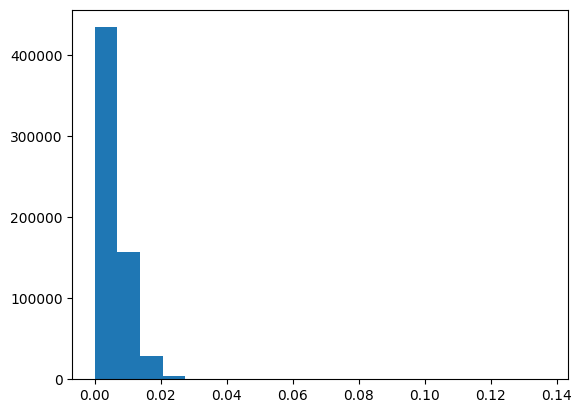

In [32]:
import matplotlib.pyplot as plt

plt.hist(diff_sereise, bins=20)
plt.show()

### test_new の重複ないデータの分布を確認

重複無しのデータについては必ず９年目の後半に含まれているはず

<Axes: >

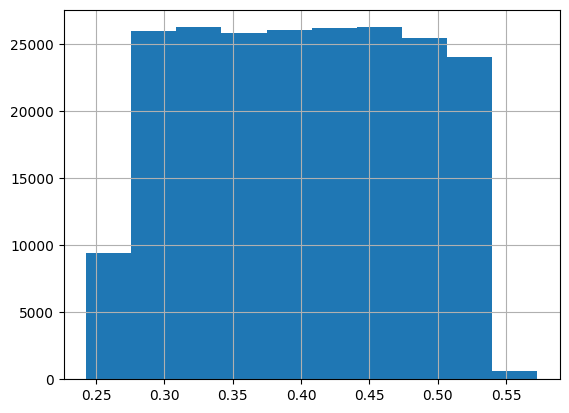

In [33]:
no_duplicated = test_info_df.with_columns(
    (pl.count("day").over(["no_year_timestamp", "location"]) == 2).alias(
        "is_duplicated"
    )
).filter(pl.col("is_duplicated") == False)


no_duplicated["pred"].to_pandas().hist()

## 前半と後半に分ける

In [34]:
test_info_year_df = (
    (
        test_info_df.with_columns(
            [
                (pl.count("month").over(["no_year_timestamp", "location"]) == 2).alias(
                    "is_duplicated"
                ),
                (pl.mean("pred").over(["no_year_timestamp", "location"])).alias(
                    "pred_mean"
                ),
                (
                    pl.max("pred").over(["no_year_timestamp", "location"])
                    - pl.min("pred").over(["no_year_timestamp", "location"])
                ).alias("pred_diff"),
            ]
        )
        .with_columns(
            pl.when(pl.col("is_duplicated") == False)
            .then(pl.lit(0))
            .when(pl.col("pred") > pl.col("pred_mean"))
            .then(pl.lit(1))
            .otherwise(pl.lit(0))
            .alias("is_second_year")
        )
        .with_columns(
            pl.when((pl.col("is_second_year") == 0) & (pl.col("is_duplicated")))
            .then(pl.lit(9))
            .when(
                (pl.col("is_second_year") == 0)
                & (~pl.col("is_duplicated"))
                & (pl.col("month") >= 3)
            )
            .then(pl.lit(9))
            .when(
                (pl.col("is_second_year") == 0)
                & (~pl.col("is_duplicated"))
                & (pl.col("month") < 3)
            )
            .then(pl.lit(10))
            .when(
                (pl.col("is_second_year") == 1)
                & (pl.col("is_duplicated"))
                & (pl.col("month") >= 3)
            )
            .then(pl.lit(10))
            .otherwise(pl.lit(11))
            .alias("year")
        )
        .with_columns(
            (
                pl.datetime(
                    pl.col("year").cast(pl.Int64),
                    pl.col("month"),
                    pl.col("day"),
                    0,
                    0,
                    0,
                )
                + pl.duration(seconds=pl.col("seconds"))
            ).alias("timestamp"),
        )
        .drop(["pred_mean", "no_year_timestamp"])
    )
    .with_row_index("original_index")
    .sort(["timestamp", "location"])
    .with_row_index("sort_index")
).sort("original_index")
test_info_year_df.sort("sort_index")

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,pred_diff,is_second_year,year,timestamp
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,f32,i32,i32,datetime[μs]
0,138117,"""test_267252""",0,3,1,0,0,0.011544,true,0.527491,0,9,0009-03-01 00:00:00
1,101693,"""test_223108""",1,3,1,0,0,0.012308,true,0.524553,0,9,0009-03-01 00:00:00
2,562692,"""test_781565""",2,3,1,0,0,0.009292,true,0.530859,0,9,0009-03-01 00:00:00
3,504741,"""test_711401""",3,3,1,0,0,0.009514,true,0.530276,0,9,0009-03-01 00:00:00
4,228828,"""test_377300""",4,3,1,0,0,0.013316,true,0.523161,0,9,0009-03-01 00:00:00
…,…,…,…,…,…,…,…,…,…,…,…,…,…
624995,597036,"""test_822994""",227,8,25,28800,24,0.804436,true,0.54411,1,10,0010-08-25 08:00:00
624996,152503,"""test_284808""",228,8,25,28800,24,0.804081,true,0.537386,1,10,0010-08-25 08:00:00
624997,274314,"""test_432560""",229,8,25,28800,24,0.800769,true,0.536229,1,10,0010-08-25 08:00:00


In [55]:
test_info_year_df.sort("sort_index")[::384*3][:370].tail(10)

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,pred_diff,is_second_year,year,timestamp
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,f32,i32,i32,datetime[μs]
414720,185471,"""test_324907""",0,2,24,0,0,0.529689,false,0.0,0,10,0010-02-24 00:00:00
415872,131374,"""test_259048""",0,2,25,0,0,0.531129,false,0.0,0,10,0010-02-25 00:00:00
417024,505632,"""test_712483""",0,2,26,0,0,0.532686,false,0.0,0,10,0010-02-26 00:00:00
418176,438993,"""test_631830""",0,2,27,0,0,0.534515,false,0.0,0,10,0010-02-27 00:00:00
419328,146514,"""test_277454""",0,2,28,0,0,0.537112,false,0.0,0,10,0010-02-28 00:00:00
420480,375960,"""test_555449""",0,3,1,0,0,0.539035,true,0.527491,1,10,0010-03-01 00:00:00
421632,555296,"""test_772648""",0,3,2,0,0,0.542145,true,0.531213,1,10,0010-03-02 00:00:00
422784,624445,"""test_99334""",0,3,3,0,0,0.54568,true,0.53355,1,10,0010-03-03 00:00:00
423936,307436,"""test_472653""",0,3,4,0,0,0.547288,true,0.533072,1,10,0010-03-04 00:00:00


In [86]:
test_info_year_df.write_parquet("output/test_info_year.parquet")

## check

In [32]:
test_info_year_df.sort("sort_index")

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,pred_diff,is_second_year
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,f32,i32
0,136214,"""test_26497""",0,1,1,0,0,0.445447,false,0.0,0
1,283072,"""test_44309""",1,1,1,0,0,0.446103,false,0.0,0
2,617580,"""test_90906""",2,1,1,0,0,0.443277,false,0.0,0
3,339409,"""test_511249""",3,1,1,0,0,0.450339,false,0.0,0
4,113421,"""test_237212""",4,1,1,0,0,0.450055,false,0.0,0
…,…,…,…,…,…,…,…,…,…,…,…
624995,597036,"""test_822994""",227,8,25,28800,24,0.804436,true,0.54411,1
624996,152503,"""test_284808""",228,8,25,28800,24,0.804081,true,0.537386,1
624997,274314,"""test_432560""",229,8,25,28800,24,0.800769,true,0.536229,1


<Axes: >

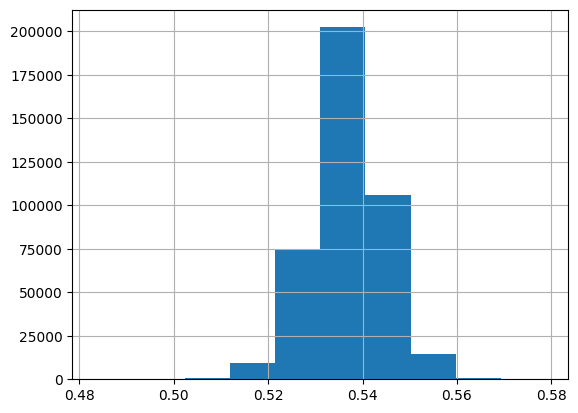

In [33]:
test_info_year_df.filter(pl.col("is_duplicated")).to_pandas()["pred_diff"].hist()

In [34]:
original2sort_index = test_info_year_df.sort("sort_index")["original_index"].to_numpy()
test_info_year_df[original2sort_index]

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,pred_diff,is_second_year
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,f32,i32
0,136214,"""test_26497""",0,1,1,0,0,0.445447,false,0.0,0
1,283072,"""test_44309""",1,1,1,0,0,0.446103,false,0.0,0
2,617580,"""test_90906""",2,1,1,0,0,0.443277,false,0.0,0
3,339409,"""test_511249""",3,1,1,0,0,0.450339,false,0.0,0
4,113421,"""test_237212""",4,1,1,0,0,0.450055,false,0.0,0
…,…,…,…,…,…,…,…,…,…,…,…
624995,597036,"""test_822994""",227,8,25,28800,24,0.804436,true,0.54411,1
624996,152503,"""test_284808""",228,8,25,28800,24,0.804081,true,0.537386,1
624997,274314,"""test_432560""",229,8,25,28800,24,0.800769,true,0.536229,1


In [35]:
test_info_year_df

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,pred_diff,is_second_year
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,f32,i32
76646,0,"""test_0""",230,3,8,28800,24,0.027219,true,0.523423,0
435511,1,"""test_10""",55,3,14,0,0,0.559951,true,0.532115,1
590977,2,"""test_100""",1,7,27,0,0,0.758606,true,0.531864,1
235801,3,"""test_1000""",25,7,24,57600,48,0.217828,true,0.534374,0
88536,4,"""test_10000""",216,3,18,57600,48,0.023667,true,0.541954,0
…,…,…,…,…,…,…,…,…,…,…,…
28138,624995,"""test_99994""",106,1,25,28800,24,0.491826,false,0.0,0
418532,624996,"""test_99995""",356,12,30,0,0,0.448537,false,0.0,0
139752,624997,"""test_99996""",360,5,2,0,0,0.094956,true,0.530829,0
